In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import dython as d

In [2]:
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_colwidth', None)

sns.set(rc={'figure.figsize':(11.7,8.27)})

In [14]:
survey = pd.read_excel('survey_cleaned_hand.xlsx').set_index('time')
survey = survey.iloc[:,1:]
survey.head()

,age,gender,place,relationship,economic,first_intercourse,age_first_intercourse,ever_experienced,ever_bullied,religious,church_freq,religion_impact_sex_life_0-10,religion_impact_sex_life_open,first_heard_any_sex_activity,first_heard_how_conception,first_heard_pleasures_sex,sex_info_source_parents,sex_info_source_colleagues,sex_info_source_school,sex_info_source_social_media,sex_info_source_websites,sex_info_source_books_magazines,sex_info_source_porn,sex_info_source_doctors,sex_info_source_church,sexed_school,sexed_school_satisfactory,comfort_on_sexed_school,sexed_school_orientation,how_teacher_sex_orientation,comfort_on_sex_talks_parents,if_condom_breaks,what_prevents_stds,method_100%_prevents_pregnancy,relationship_sexed_sex_violence,relationship_sexed_stds,problem_buying_contraception,rich_teens_easier_care_sex_health,learn_sexed_in_church,church_topics,sexed_topics,friend_unwanted_pregnancy_recommendation,place_v,place_p,place_pc,e_e_num,church_topics_label_masturb,church_topics_label_contraception,church_topics_label_abortion,church_topics_label_premarital,church_topics_label_orient,church_topics_label_nfp,church_topics_label_pedo,church_topics_label_violence,church_topics_label_values,church_topics_label_sin,church_topics_label_stis,church_topics_label_porn,church_topics_label_in_vitro,sexed_topics_yes,sexed_topics_no,sexed_topics_idk,sexed_topics_label_masturb,sexed_topics_label_contraception,sexed_topics_label_abortion,sexed_topics_label_idk,sexed_topics_label_orient,sexed_topics_label_nfp,sexed_topics_label_pedophilia,sexed_topics_label_violence,sexed_topics_label_values,sexed_topics_label_stis,sexed_topics_label_porn,pregnancy_label_abort,pregnancy_label_adopt,pregnancy_label_raise,pregnancy_label_give_birth,pregnancy_label_idk,pregnancy_label_seek_help,pregnancy_label_her_choice,pregnancy_label_support
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-29 20:41:31.534,29.0,Kobieta,warszawa,Jestem w związku małżeńskim,Dobra,Tak,19.0,"comment, sexting, exhib, touch","nie, nigdy mnie nie dręczono.",Tak,1: Okazjonalnie,6,Pewnie więcej bym spróbowała gdyby nie to przed stałym zwiazkiem,4.0,12.0,4,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Tak,Nie,7.0,Nie,NaN,8,True,True,True,"Tak, im więcej edukacji seksualnej, tym mniej przemocy seksualnej","Tak, im więcej edukacji seksualnej, tym mniej zakażeń",Nie,Tak,Nie,NaN,"Tak, wszystkie istotne - np jak w książce sexed. Bez tabu, na luzie, bez spiny, w jasny i przystępny sposób",Rozważenie aborcji,mazowieckie,1790658.0,city,2.5,False,False,False,False,False,False,False,False,False,False,False,False,False,1.0,0.0,0.0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False
2020-01-29 20:45:15.164,19.0,Kobieta,warszawa,Nie,Dobra,Tak,17.0,touch,"nie, nigdy mnie nie dręczono.",Tak,1: Okazjonalnie,0,Neutralnie,9.0,12.0,12,0.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,Tak,Nie,5.0,Nie,NaN,1,True,True,True,"Tak, im więcej edukacji seksualnej, tym mniej przemocy seksualnej","Tak, im więcej edukacji seksualnej, tym mniej zakażeń","Nie, nigdy próbowałam/próbowałem otrzymać recepty ani kupić antykoncepcji w aptece",Trudno powiedzieć,Nie,NaN,Jest potrzebna,Jeśli było by to możliwe to zażycie tabletki dzień po jeśli nie ciężko mi odpowiedzieć na to pytanie,mazowieckie,1790658.0,city,4.0,False,False,False,False,False,False,False,False,False,False,False,False,False,1.0,0.0,0.0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False
2020-01-29 20:45:34.371,19.0,Kobieta,slask,Tak,Dobra,Tak,19.0,nothing,wyglądu,Tak,2: Czasami,4,Negatywnie,12.0,12.0,15,1.0,3.0,0.0,2.0,2.0,1.0,0.0,1.0,0.0,Nie,NaN,NaN,NaN,NaN,2,True,True,True,"Tak, im więcej edukacji seksualnej, tym mniej przemocy seksualnej","Tak, im więcej edukacji seksualnej, tym mniej zakażeń",Nie,Tak,Nie,NaN,Tak. Podstawowe Informacje dla osob np przed rozpoczeciem współżycia,Aby podjela decyzje zgodna z jej sum

In [4]:
survey.columns.tolist()

['age',
 'gender',
 'place',
 'relationship',
 'economic',
 'first_intercourse',
 'age_first_intercourse',
 'ever_experienced',
 'ever_bullied',
 'religious',
 'church_freq',
 'religion_impact_sex_life_0-10',
 'religion_impact_sex_life_open',
 'first_heard_any_sex_activity',
 'first_heard_how_conception',
 'first_heard_pleasures_sex',
 'sex_info_source_parents',
 'sex_info_source_colleagues',
 'sex_info_source_school',
 'sex_info_source_social_media',
 'sex_info_source_websites',
 'sex_info_source_books_magazines',
 'sex_info_source_porn',
 'sex_info_source_doctors',
 'sex_info_source_church',
 'sexed_school',
 'sexed_school_satisfactory',
 'comfort_on_sexed_school',
 'sexed_school_orientation',
 'how_teacher_sex_orientation',
 'comfort_on_sex_talks_parents',
 'if_condom_breaks',
 'what_prevents_stds',
 'method_100%_prevents_pregnancy',
 'relationship_sexed_sex_violence',
 'relationship_sexed_stds',
 'problem_buying_contraception',
 'rich_teens_easier_care_sex_health',
 'learn_sexed_in

In [5]:
demo = ['age','gender', 'place_v', 'place_p', 'relationship','economic']

sex_exp =  ['first_intercourse', 'age_first_intercourse', 'ever_experienced', 'ever_bullied']

religion = ['religious', 'church_freq', 'religion_impact_sex_life_0-10', 'religion_impact_sex_life_open',
            'learn_sexed_in_church',  'church_topics_label_masturb', 'church_topics_label_contraception',
            'church_topics_label_abortion', 'church_topics_label_premarital', 'church_topics_label_orient',
            'church_topics_label_nfp', 'church_topics_label_pedo', 'church_topics_label_violence',
            'church_topics_label_values','church_topics_label_sin', 'church_topics_label_stis',
            'church_topics_label_porn', 'church_topics_label_in_vitro']

sexed = ['first_heard_any_sex_activity', 'first_heard_how_conception', 'first_heard_pleasures_sex', 
         'sex_info_source_parents', 'sex_info_source_colleagues', 'sex_info_source_school', 
         'sex_info_source_social_media', 'sex_info_source_websites', 'sex_info_source_books_magazines',
         'sex_info_source_porn', 'sex_info_source_doctors', 'sex_info_source_church', 'sexed_school',
         'sexed_school_satisfactory', 'comfort_on_sexed_school', 'sexed_school_orientation',
         'how_teacher_sex_orientation', 'comfort_on_sex_talks_parents',]

knowledge = ['if_condom_breaks',  'what_prevents_stds', 'method_100%_prevents_pregnancy',
                 'relationship_sexed_sex_violence', 'relationship_sexed_stds', 'problem_buying_contraception',
                 'rich_teens_easier_care_sex_health']

opinions = ['sexed_topics_yes',
 'sexed_topics_no',
 'sexed_topics_idk',
 'sexed_topics_label_masturb',
 'sexed_topics_label_contraception',
 'sexed_topics_label_abortion',
 'sexed_topics_label_idk',
 'sexed_topics_label_orient',
 'sexed_topics_label_nfp',
 'sexed_topics_label_pedophilia',
 'sexed_topics_label_violence',
 'sexed_topics_label_values',
 'sexed_topics_label_stis',
 'sexed_topics_label_porn',
 'pregnancy_label_abort',
 'pregnancy_label_adopt',
 'pregnancy_label_raise',
 'pregnancy_label_idk',
 'pregnancy_label_seek_help',
 'pregnancy_label_her_choice',
 'pregnancy_label_give_birth',
 'pregnancy_label_support']

In [6]:
#religion.append('place_v')

rsur = survey[survey.learn_sexed_in_church == 'Tak'].loc[:,religion]
rsur.head()

,religious,church_freq,religion_impact_sex_life_0-10,religion_impact_sex_life_open,learn_sexed_in_church,church_topics_label_masturb,church_topics_label_contraception,church_topics_label_abortion,church_topics_label_premarital,church_topics_label_orient,church_topics_label_nfp,church_topics_label_pedo,church_topics_label_violence,church_topics_label_values,church_topics_label_sin,church_topics_label_stis,church_topics_label_porn,church_topics_label_in_vitro
time,,,,,,,,,,,,,,,,,,
2020-01-29 20:55:32.275,Tak,Czasami,0,Neutralnie,Tak,False,False,False,False,False,False,False,False,True,True,False,False,False
2020-01-29 20:55:58.716,Tak,W każdą niedzielę i święta,0,Neutralnie,Tak,True,False,False,False,False,False,False,False,False,False,False,False,False
2020-01-29 21:01:44.528,Tak,Nigdy,0,Negatywnie,Tak,False,False,False,False,False,False,False,False,False,True,False,False,False
2020-01-29 21:09:47.279,Nie,Nigdy,0,Neutralnie,Tak,True,False,False,True,False,False,False,False,False,True,False,False,False
2020-01-29 21:17:00.878,Tak,W każdą niedzielę i święta,7,Pozytywnie,Tak,False,False,False,False,False,False,False,False,True,False,False,False,False


## Podstawowe dane

W komórce poniżej znajdziecie rozkład poszczególnych pytań na maksymalnie 20 najpopularniejszych wartości, mam nadzieję, że jest w miarę czytelny. Nie mówi nic o korelacjach, tylko opisuje poszczególne pytania. 'nan' oznacza brak odpowiedzi na dane pytanie.

Wykresy, które mogą nie być jasne:

<b>ever_experienced</b> = tutaj skróciłem odpowiedzi wg klucza:

'nothing':'nie, nic takiego mnie nie spotkało'

'comment':'niechcianych komentarzy o charakterze seksualnym',

'sexting':'niechcianych wiadomości, zdjęć lub filmów o charakterze seksualnym',

'exhib':'ktoś obnażał się przede mną lub pokazywał mi swoje miejsca intymne bez mojej zgody',

'touch':'niechcianego dotyku',

'act':'niechcianej aktywności seksualnej \(dotykania miejsc intymnych, kontaktu oralnego, waginalnego, analnego, gwałtu lub innej\)',

<b>place_v</b> = miejsce zamieszkania wg województw <br>


<b>place_pc</b> = miejsce zamieszkania wg ludności, "city" to miasta pow 250 tys, "town" - między 250 a 10 tys, village - te poniżej 10 tys. 

age


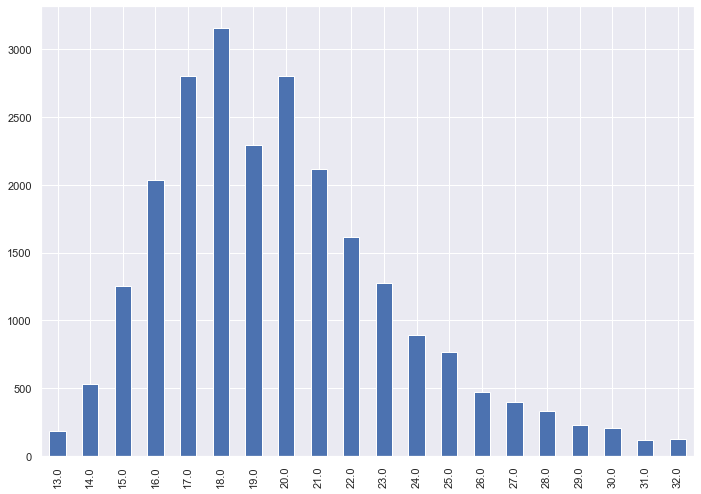

gender


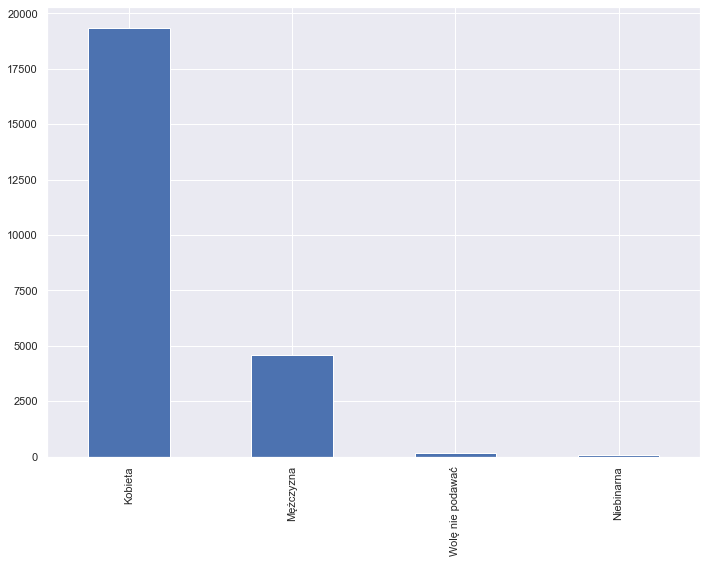

place


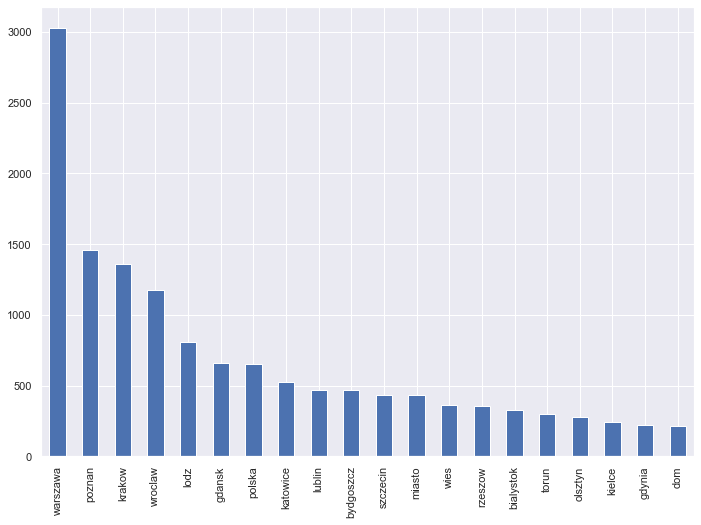

relationship


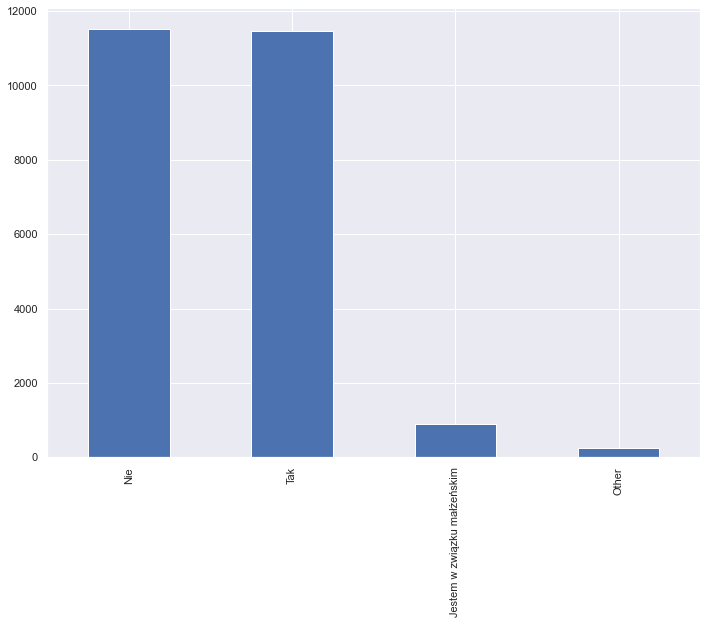

economic


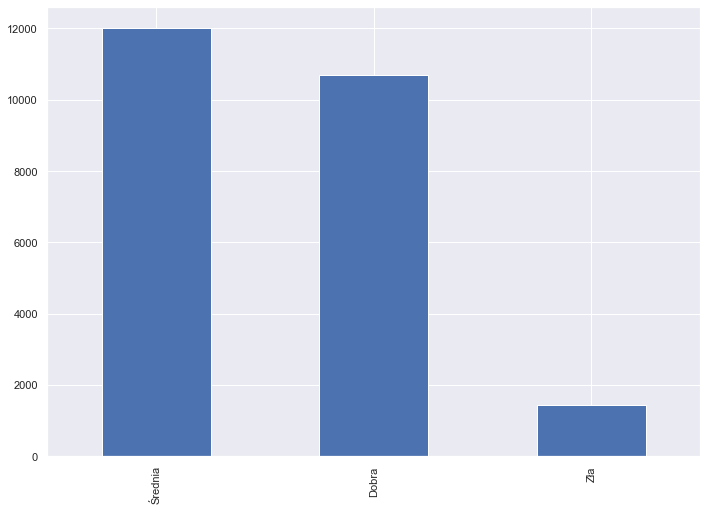

first_intercourse


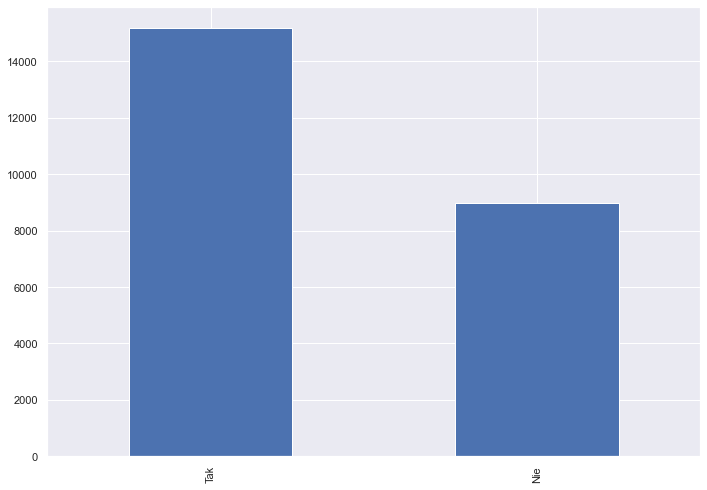

age_first_intercourse


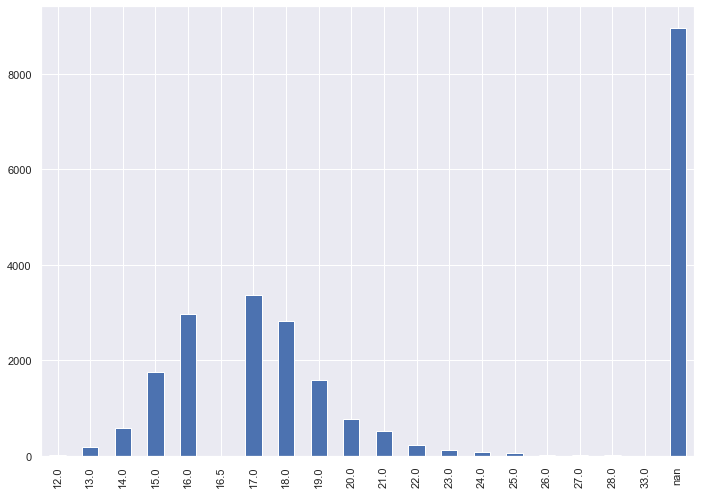

ever_experienced


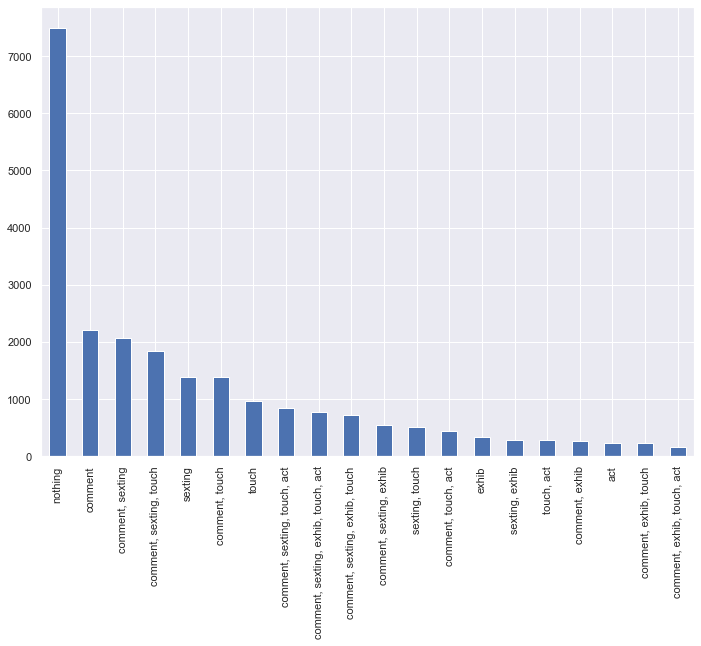

ever_bullied


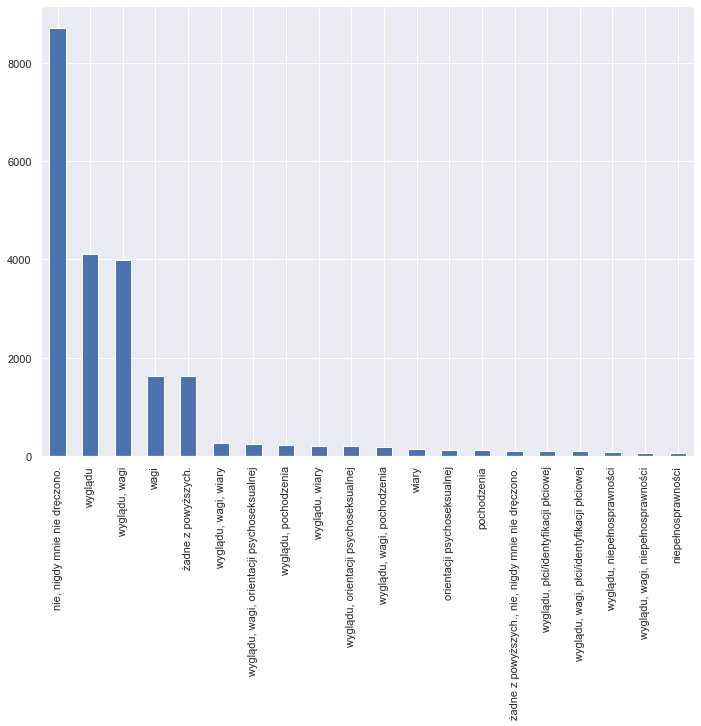

religious


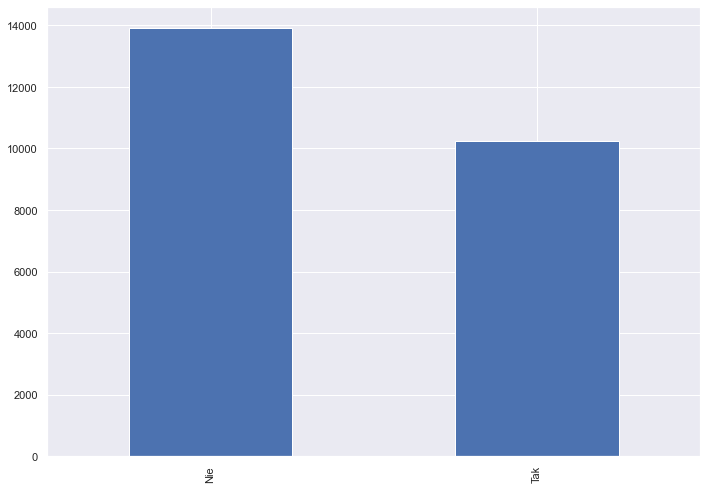

church_freq


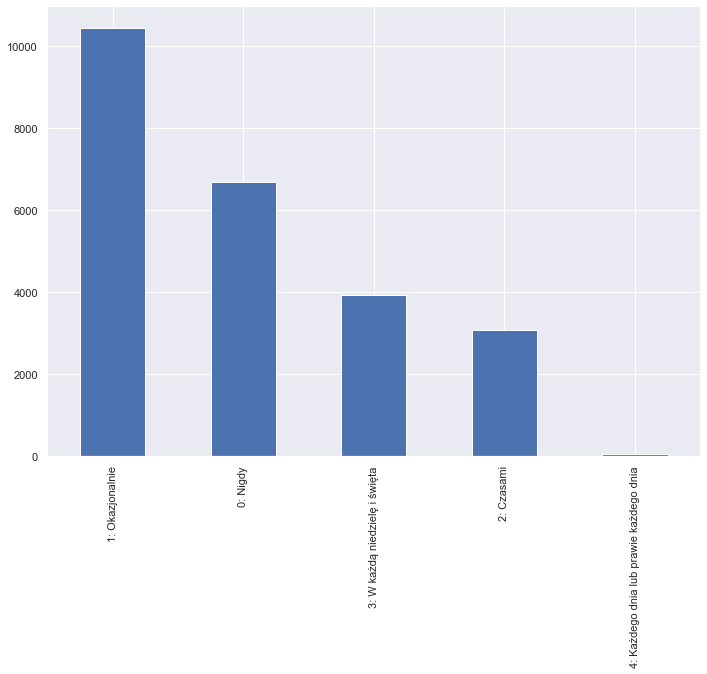

religion_impact_sex_life_0-10


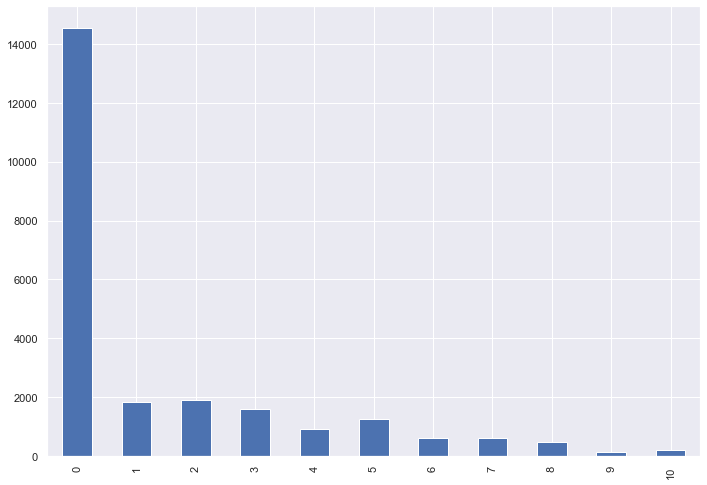

religion_impact_sex_life_open


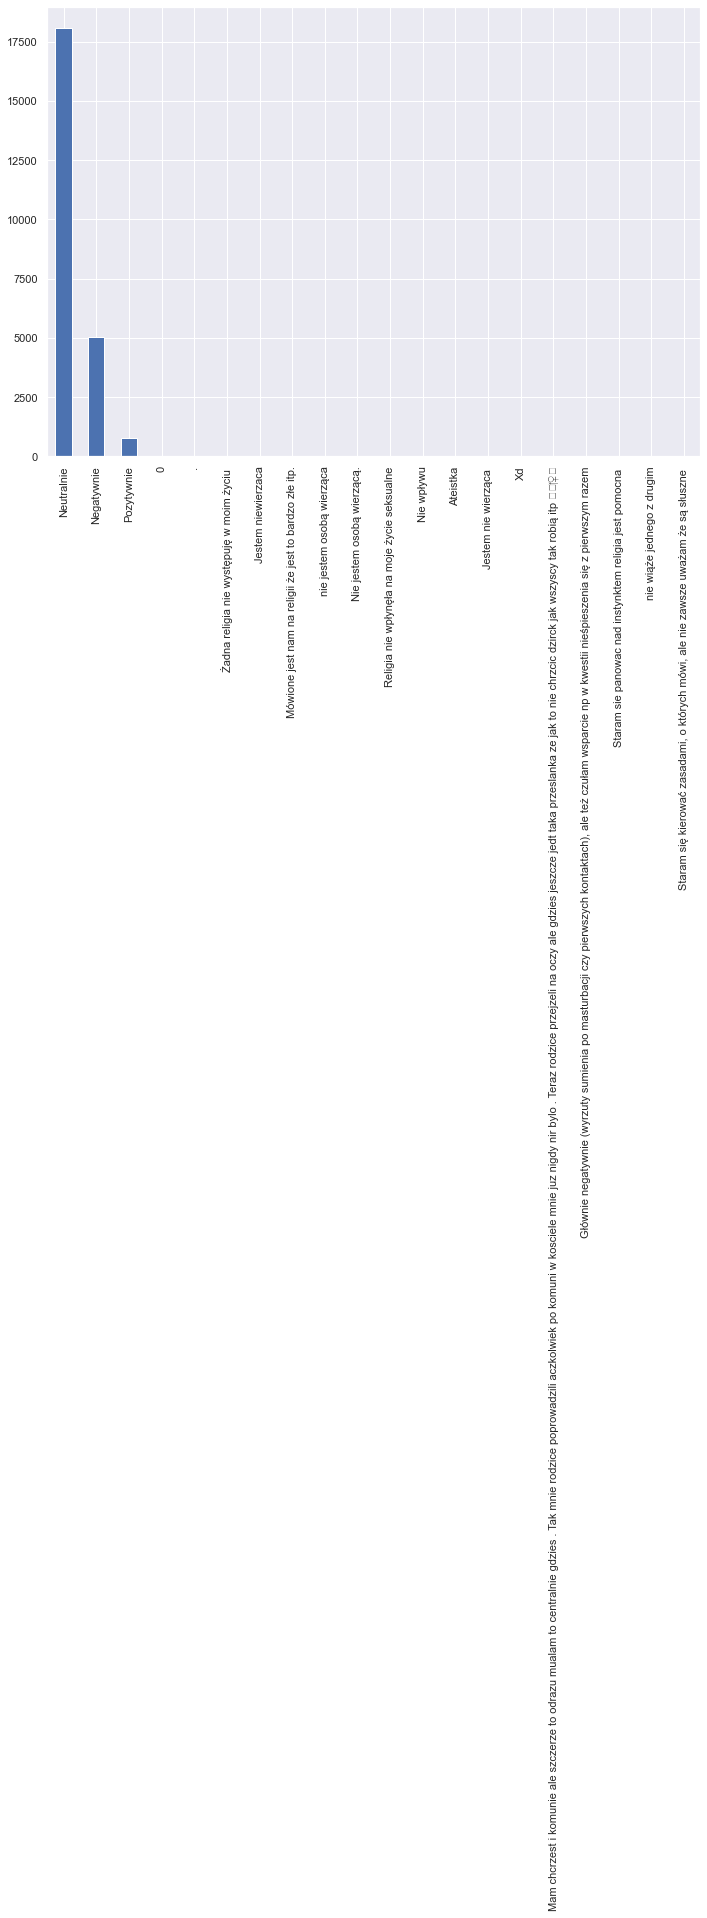

first_heard_any_sex_activity


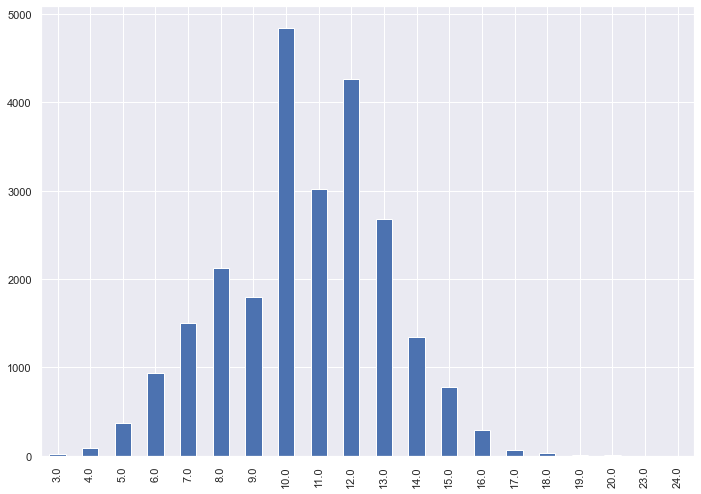

first_heard_how_conception


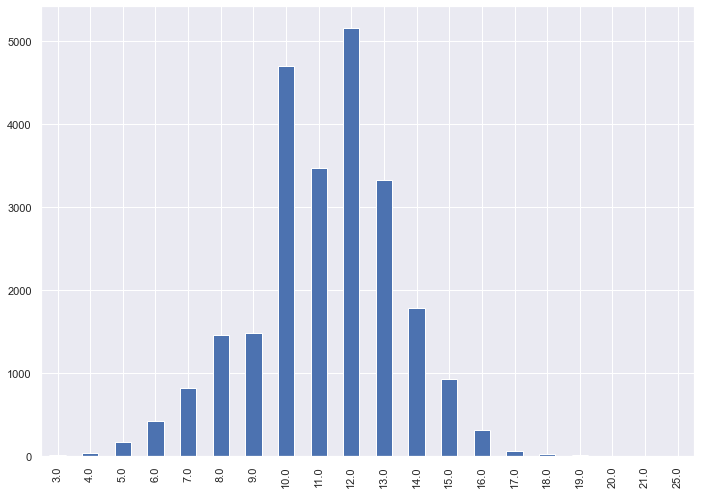

first_heard_pleasures_sex


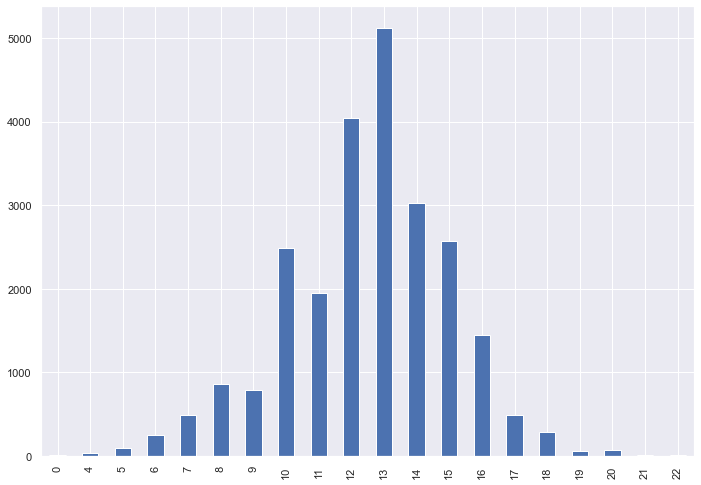

sex_info_source_parents


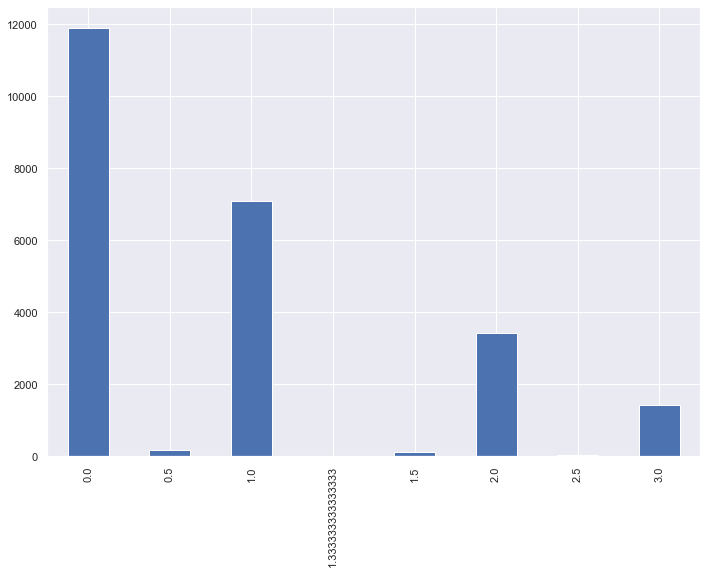

sex_info_source_colleagues


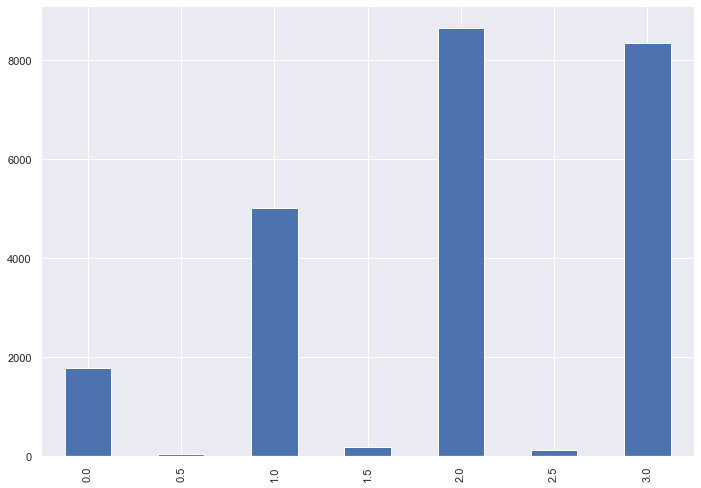

sex_info_source_school


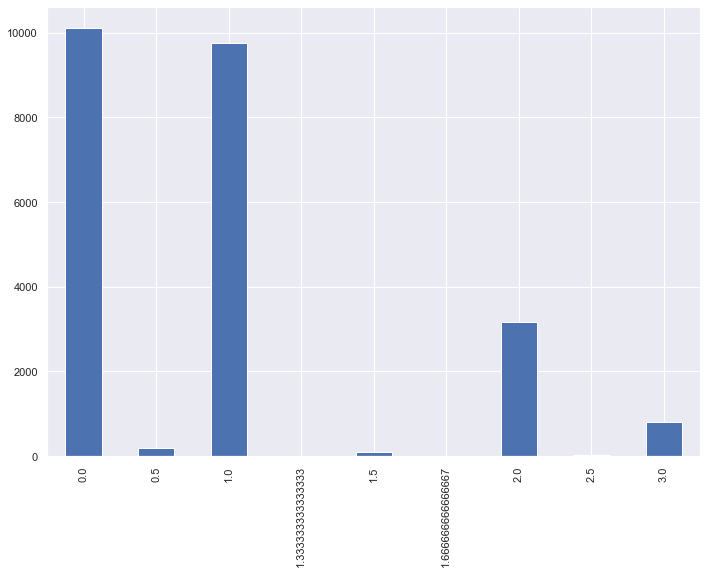

sex_info_source_social_media


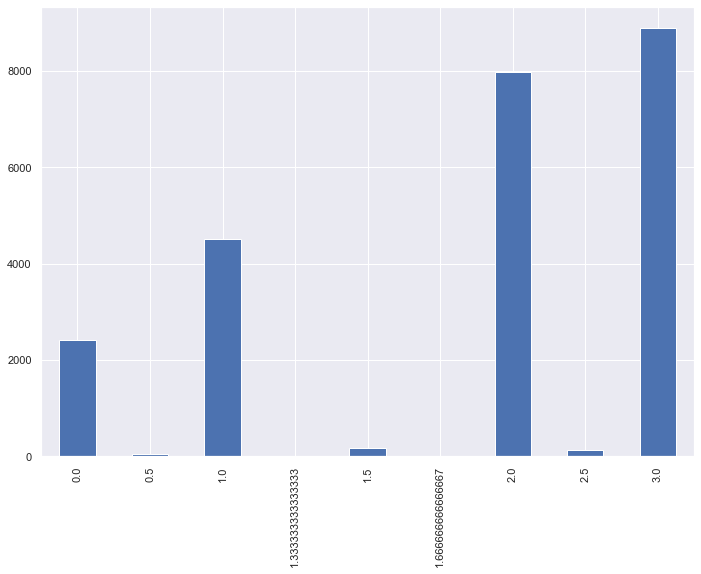

sex_info_source_websites


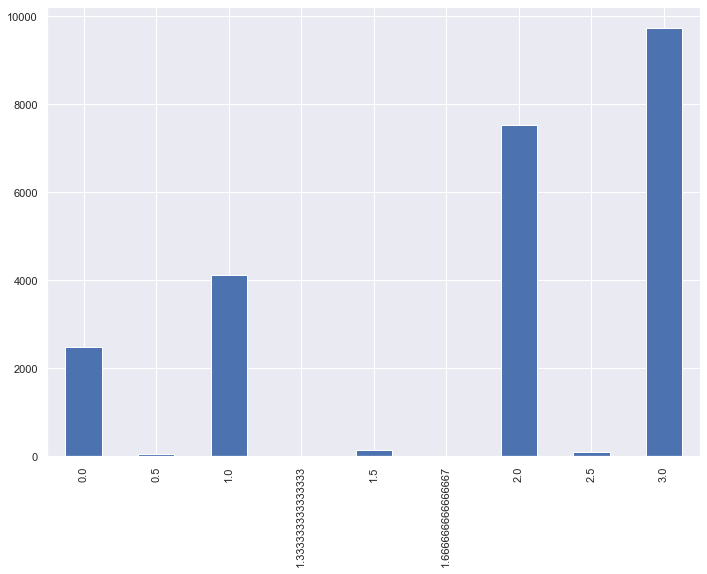

sex_info_source_books_magazines


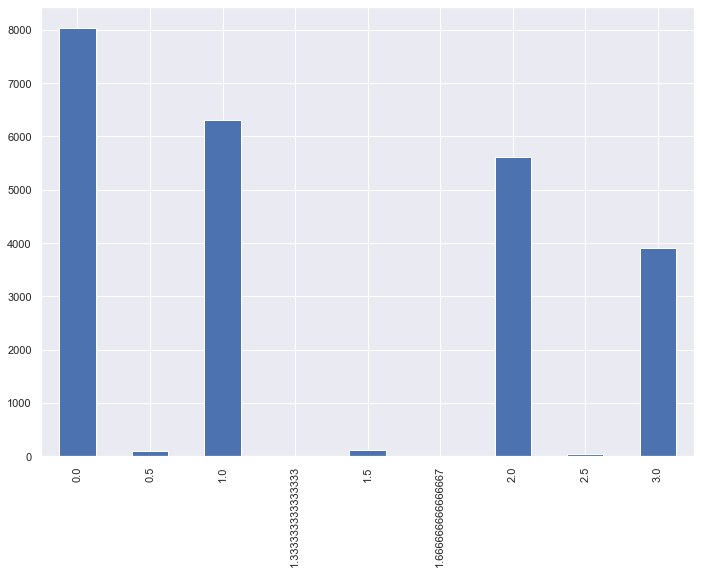

sex_info_source_porn


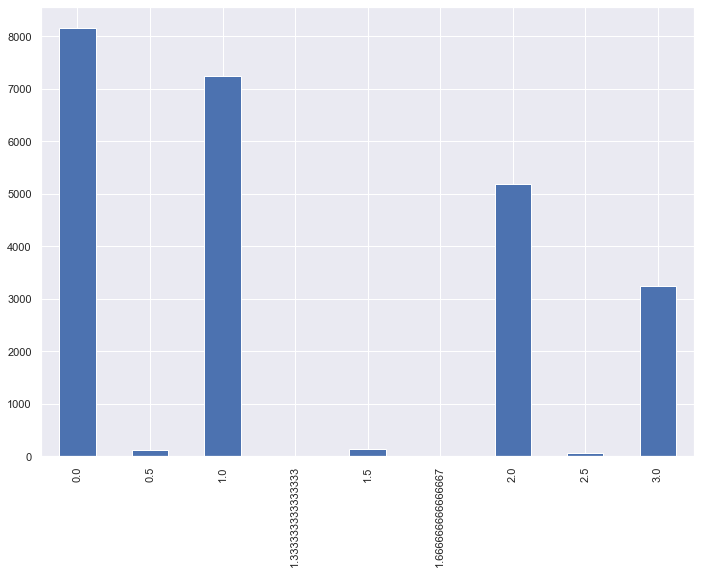

sex_info_source_doctors


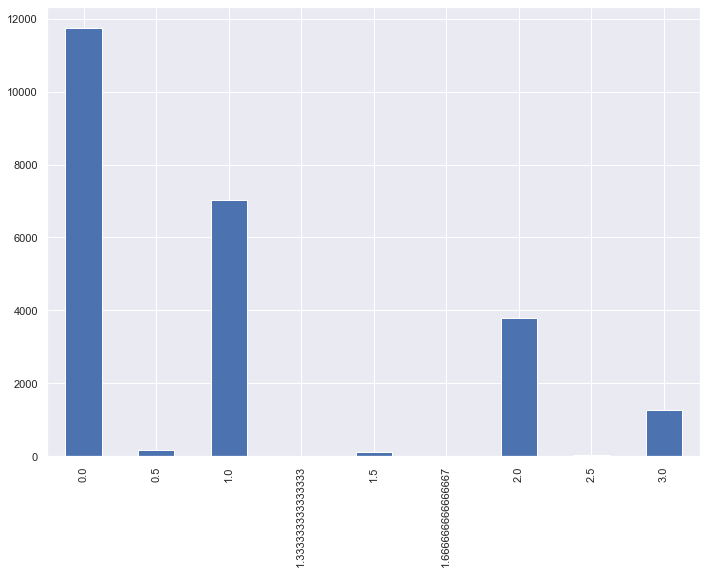

sex_info_source_church


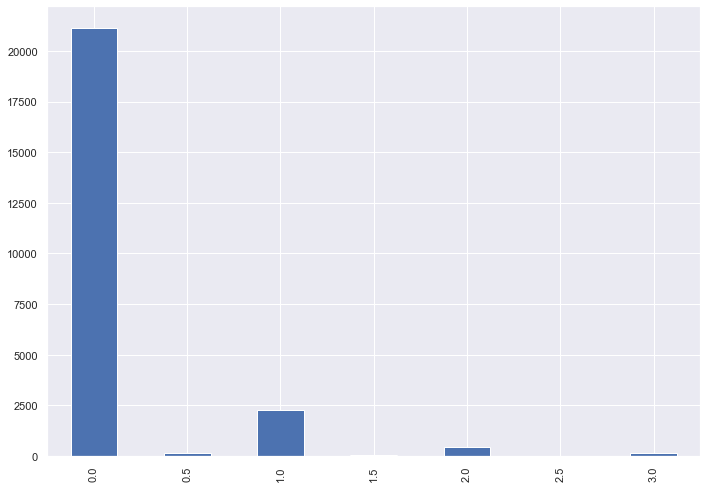

sexed_school


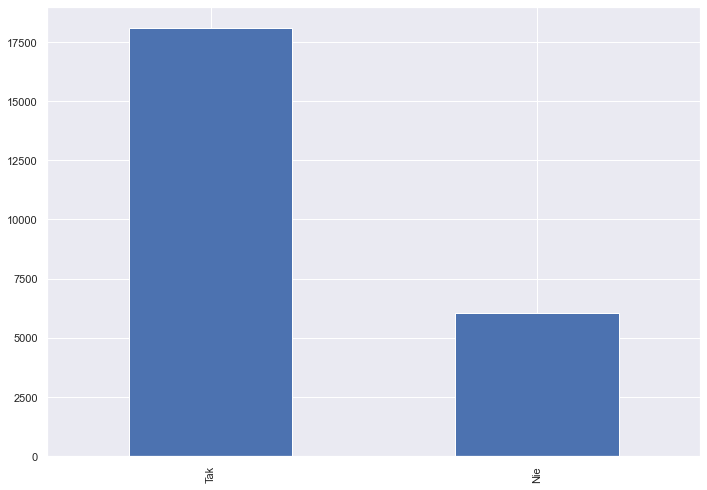

sexed_school_satisfactory


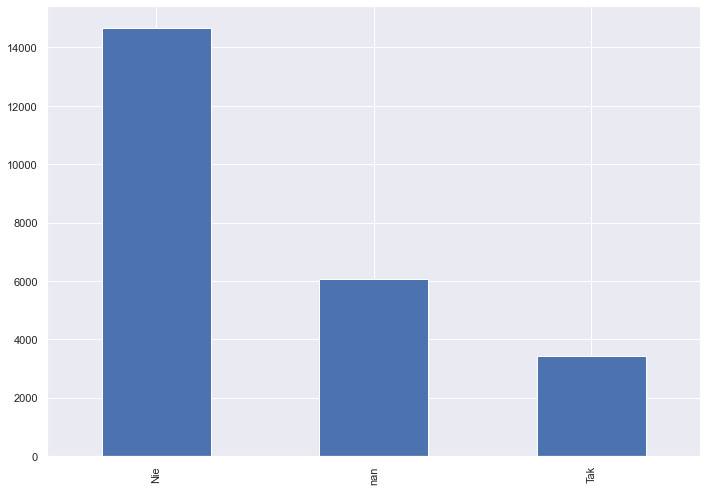

comfort_on_sexed_school


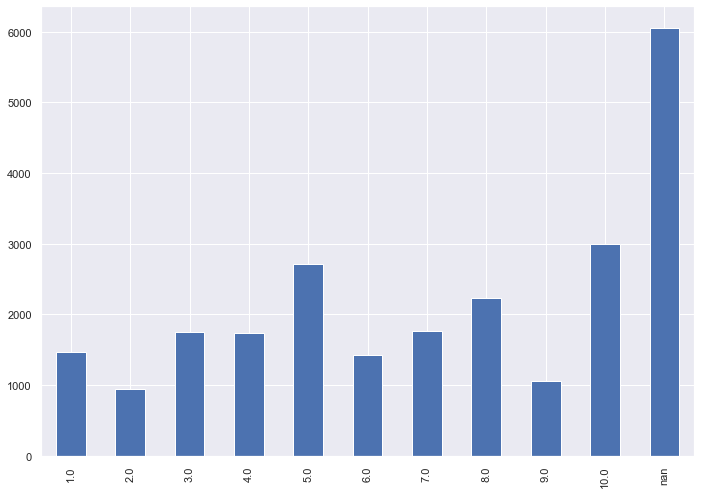

sexed_school_orientation


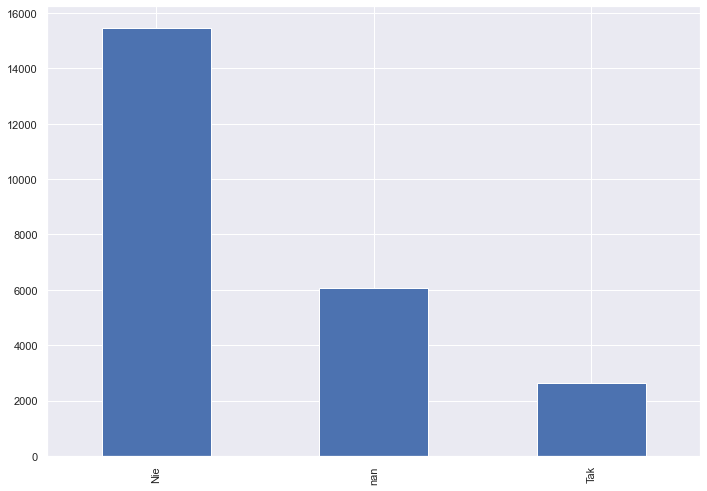

how_teacher_sex_orientation


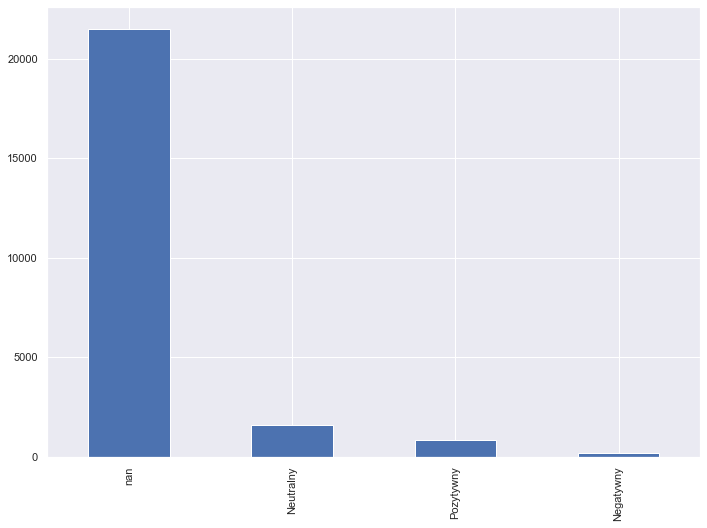

comfort_on_sex_talks_parents


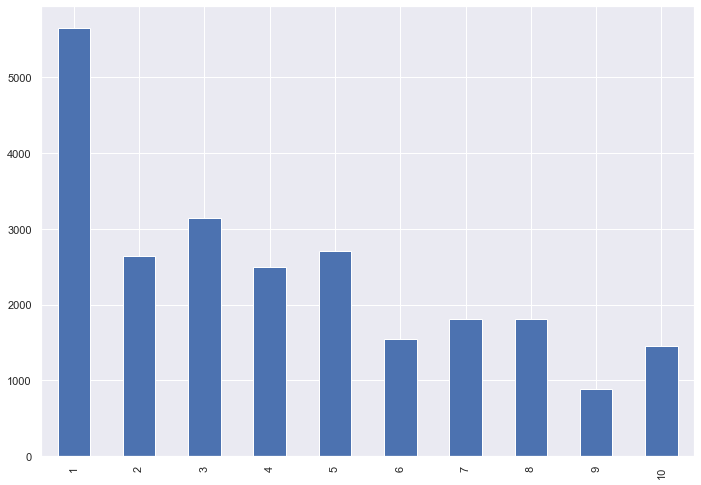

if_condom_breaks


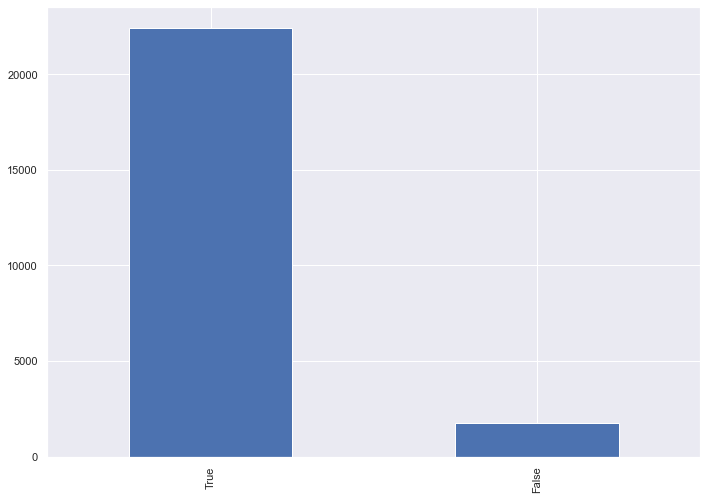

what_prevents_stds


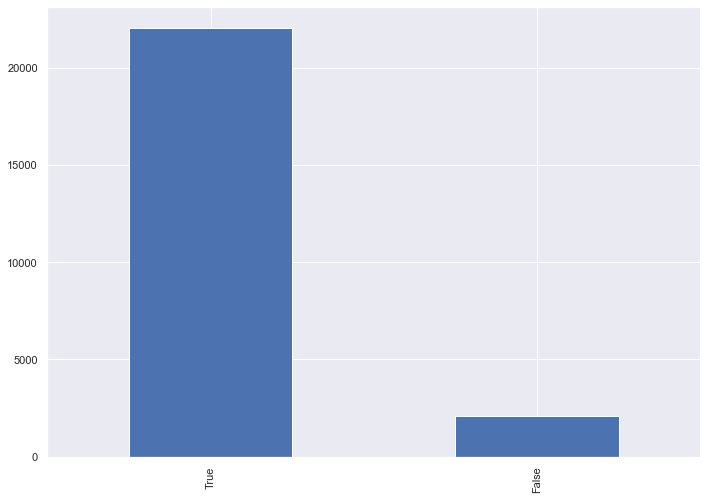

method_100%_prevents_pregnancy


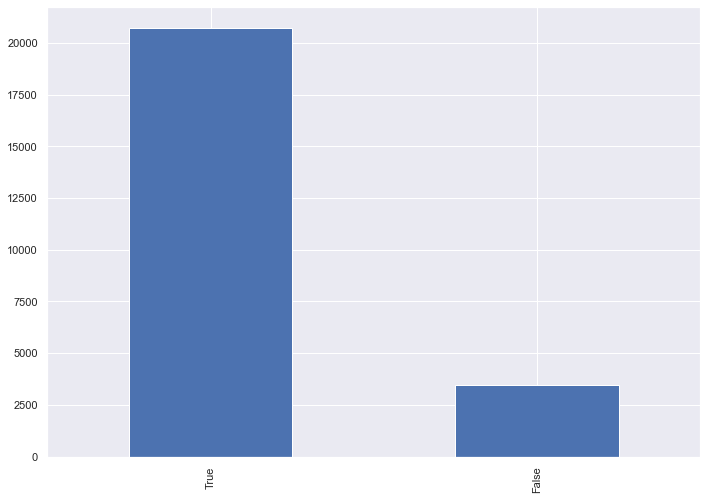

relationship_sexed_sex_violence


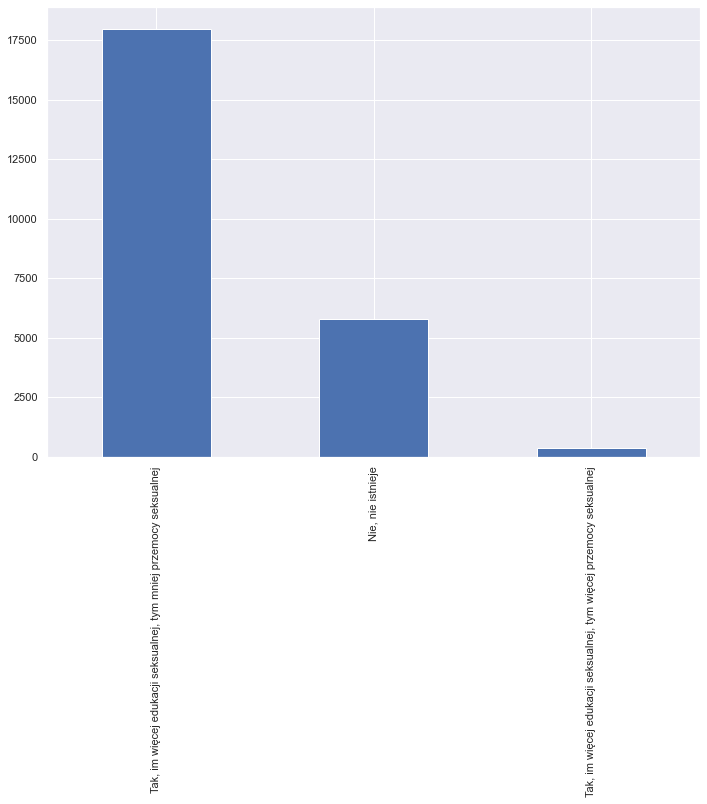

relationship_sexed_stds


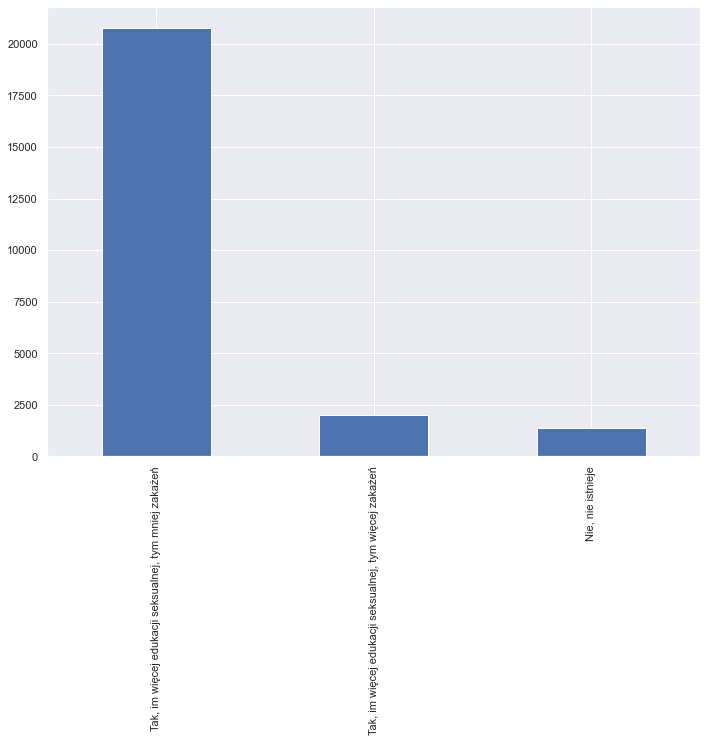

problem_buying_contraception


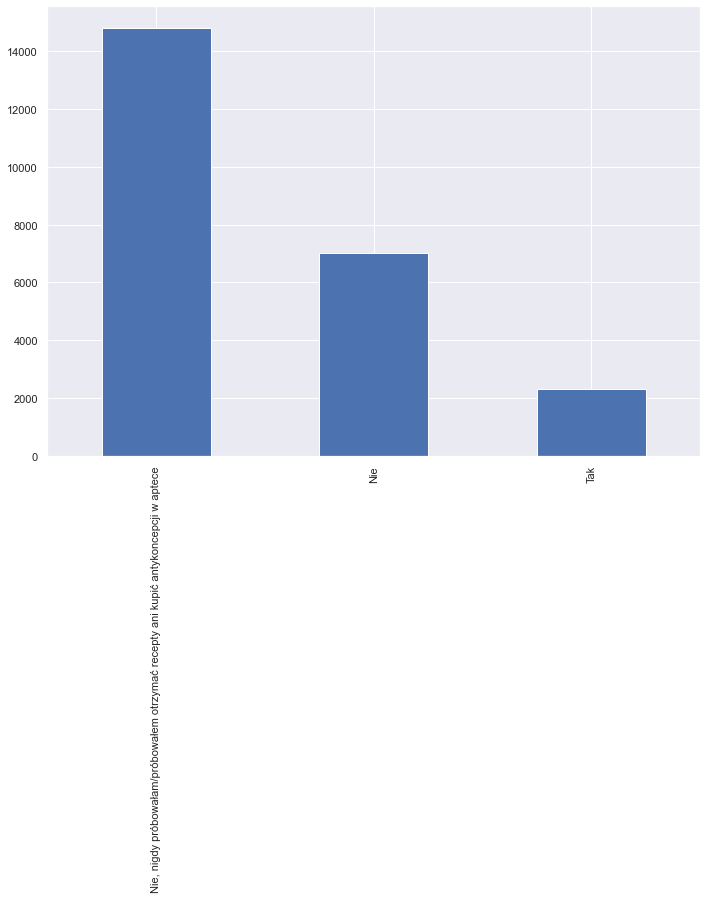

rich_teens_easier_care_sex_health


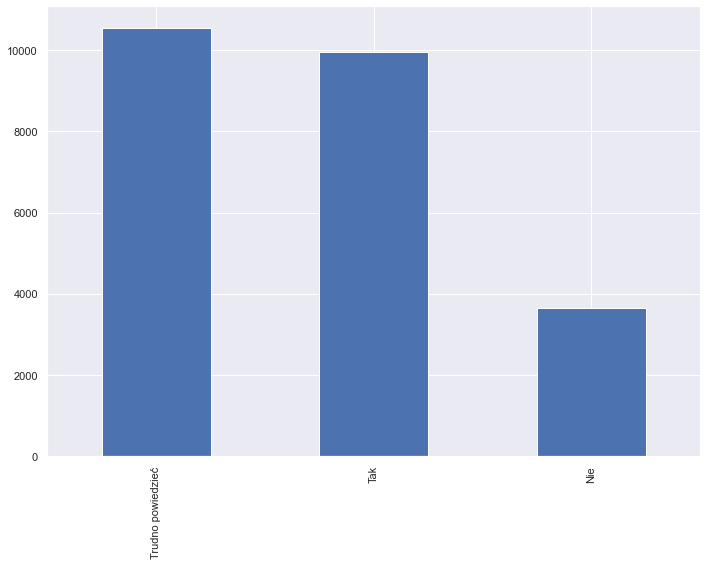

learn_sexed_in_church


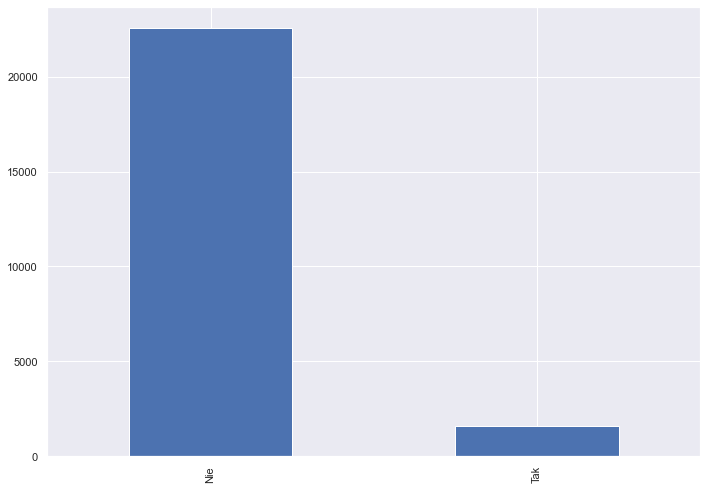

church_topics


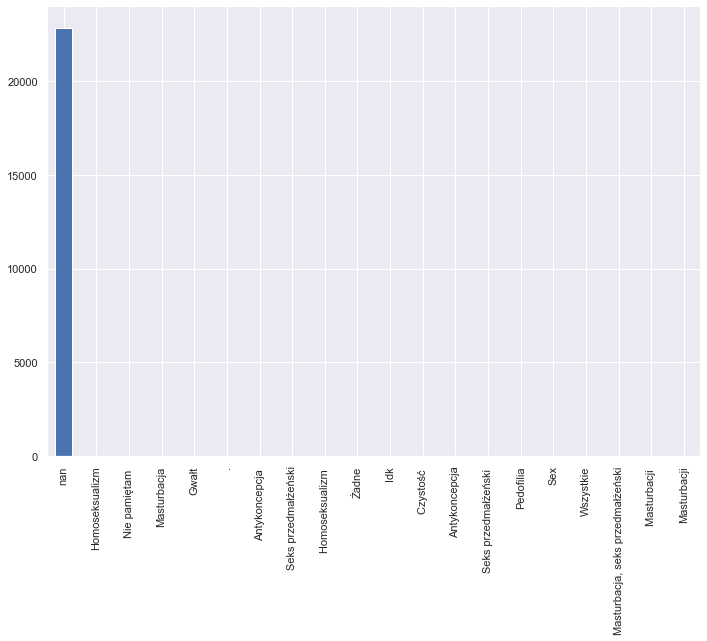

sexed_topics


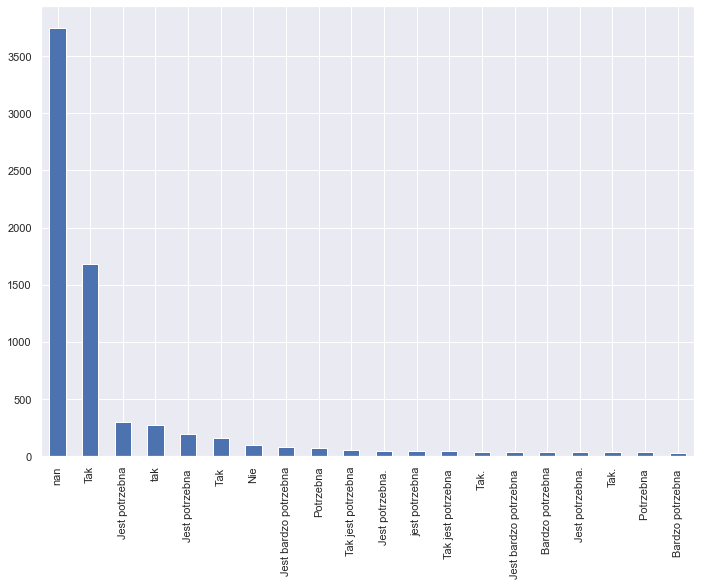

friend_unwanted_pregnancy_recommendation


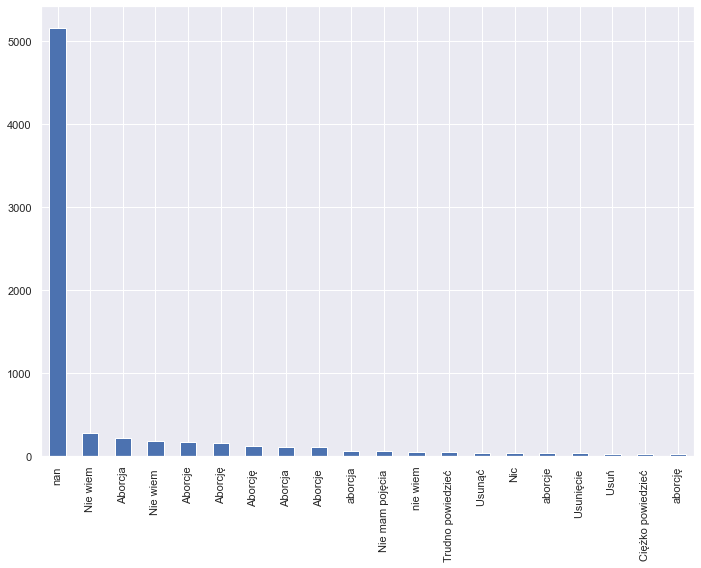

place_v


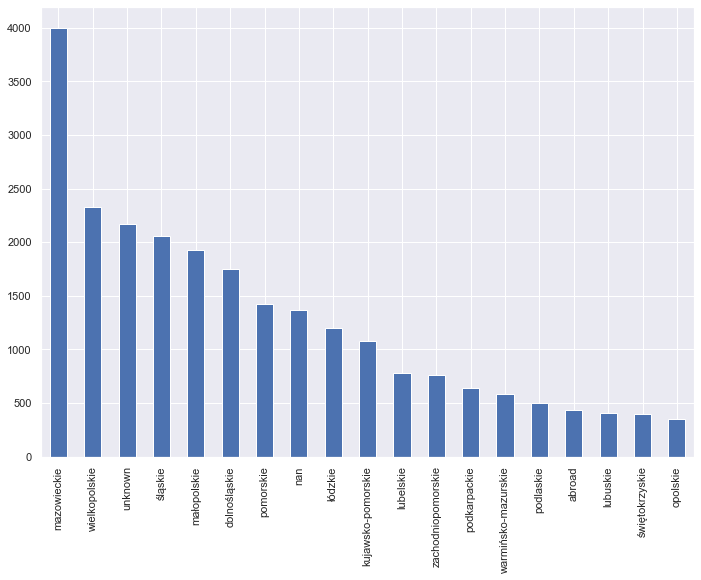

place_p


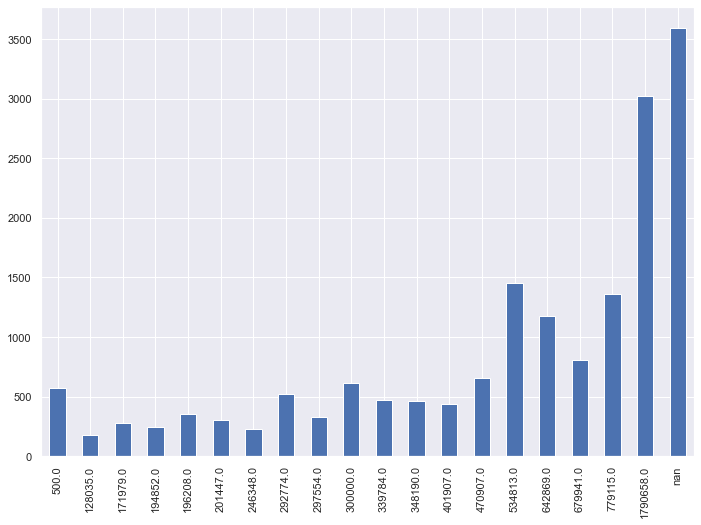

place_pc


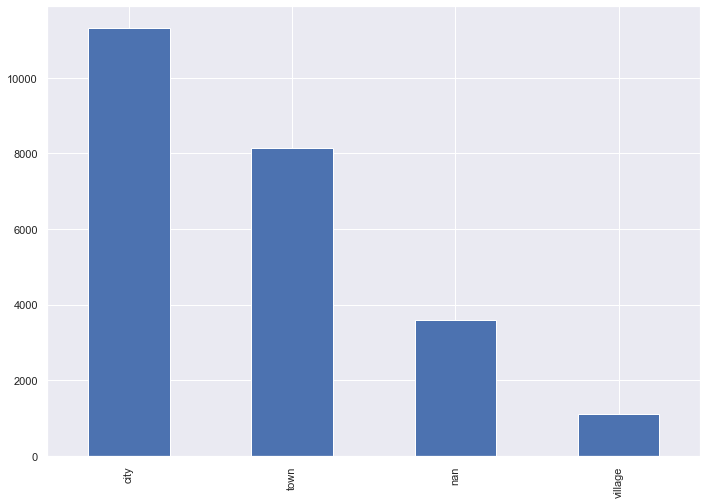

In [50]:
for c in survey.columns.tolist()[:-36]:
    print(c)
    if survey[c].dtype == 'float64':
        survey[c].value_counts(dropna=False).head(20).sort_index().plot.bar()
    elif survey[c].dtype == 'int64':
        survey[c].value_counts(dropna=False).head(20).sort_index().plot.bar()
    else:
        survey[c].value_counts(dropna=False).head(20).plot.bar()
    plt.show()

In [24]:
bools = ['if_condom_breaks',
       'what_prevents_stds', 'method_100%_prevents_pregnancy',
         'sexed_topics_label_masturb',
 'sexed_topics_label_contraception',
 'sexed_topics_label_abortion',
 'sexed_topics_label_idk',
 'sexed_topics_label_orient',
 'sexed_topics_label_nfp',
 'sexed_topics_label_pedophilia',
 'sexed_topics_label_violence',
 'sexed_topics_label_values',
 'sexed_topics_label_stis',
 'sexed_topics_label_porn',
 'pregnancy_label_abort',
 'pregnancy_label_adopt',
 'pregnancy_label_raise',
 'pregnancy_label_idk',
 'pregnancy_label_seek_help',
 'pregnancy_label_her_choice',
 'pregnancy_label_give_birth',
 'pregnancy_label_support']

In [25]:
knowledge = ['co zrobić, gdy pęknie gumka?','co zapobiega chorobom?','co zapobiega 100% ciąży?']

sexed_topics= ['masturbację',
 'antykoncepcję',
 'aborcję',
 'nie wiem',
 'orientację',
 'NPR',
 'pedofilię',
 'przemoc',
 'wartości/postawy/relacje',
 'choroby i infekcje (STI/STD)',
 'pornografię']

pregnancy_label = [ 'abortuj',
 'oddaj do adopcji',
 'wychowaj',
 'nie wiem co doradzić',
 'szukaj pomocy u bliskich/specjalistów',
 'to Twój wybór',
 'uródź, nie usuwaj',
 'będę Cię wspierać']

In [26]:
verbose_cols = ['co zrobić, gdy pęknie gumka?','co zapobiega chorobom?','co zapobiega 100% ciąży?',
                'masturbację',
 'antykoncepcję',
 'aborcję',
 'nie wiem',
 'orientację',
 'NPR',
 'pedofilię',
 'przemoc',
 'wartości/postawy/relacje',
 'choroby i infekcje (STI/STD)',
 'pornografię',
 'abortuj',
 'oddaj do adopcji',
 'wychowaj',
 'nie wiem co doradzić',
 'szukaj pomocy u bliskich/specjalistów',
 'to Twój wybór',
 'uródź, nie usuwaj',
 'będę Cię wspierać']

In [27]:
def visualize(cat):
    bools.append(cat)

    grouped = survey[bools].groupby(cat).mean() * 100
    grouped.columns = verbose_cols
    
    grouped[knowledge].plot.bar(title='Jak dobrze znasz tematy sexed?',
                                   ylabel='Częstość występowania prawidłowej odpowiedzi (%)')

    grouped[sexed_topics].plot.bar(title='Jakie tematy powinna zawierać edukacja seksualna w szkole?',
                                   ylabel='Częstość występowania danej odpowiedzi (%)')
    plt.show()
    grouped[pregnancy_label].plot.bar(title='Co doradził(a)byś bliskiej osobie w niechcianej ciąży?',
                                   ylabel='Częstość występowania danej odpowiedzi (%)')
    plt.show()
    bools.pop()

## Szukanie korelacji

Wybrałem kilka kategorii: płeć, sytuacja ekonomiczna, bycie w związku, bycie po pierwszym razie, religijność, uczęszczanie do kościoła i wielkość miejsca zamieszkania, i sprawdzałem, na ile różnią się odpowiedzi na pytania o wiedzę, o potrzeby sexedowe w szkole i o niechcianą ciążę. Tutaj mam nadzieję, że wykresy się same tłumaczą, jeśli tak nie jest, dajcie znać :)

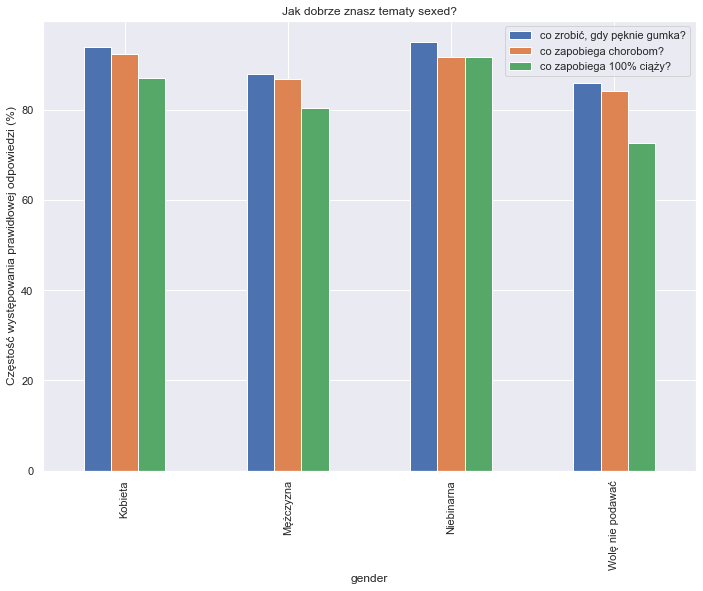

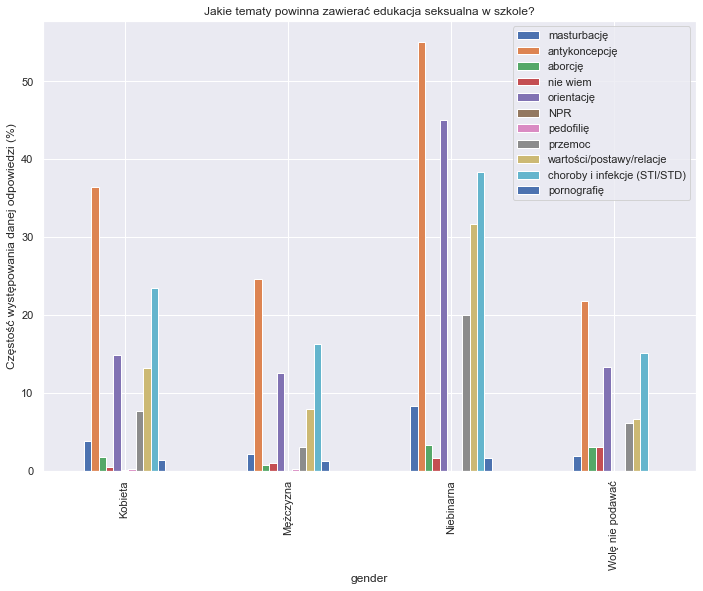

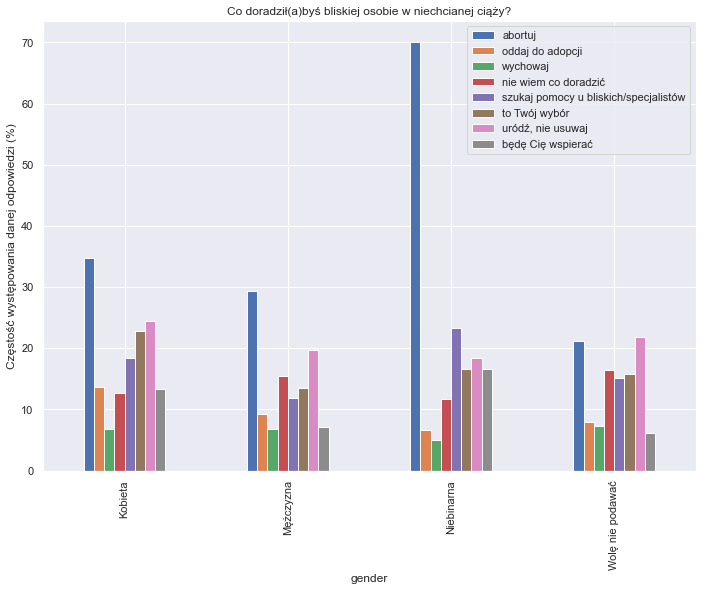

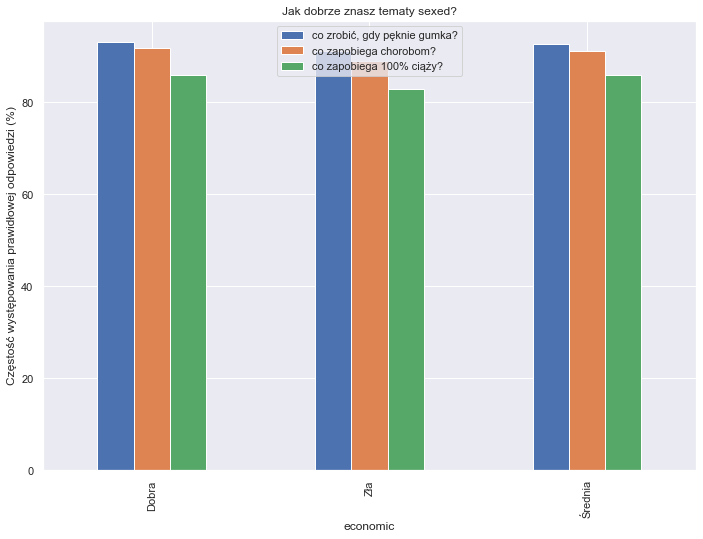

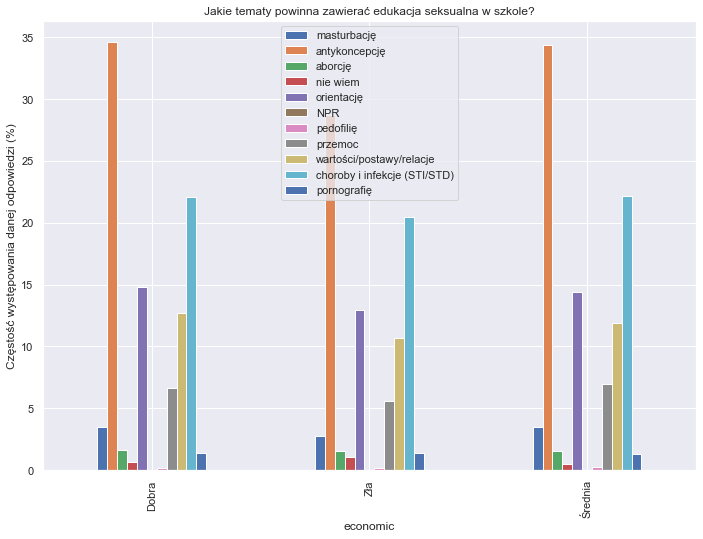

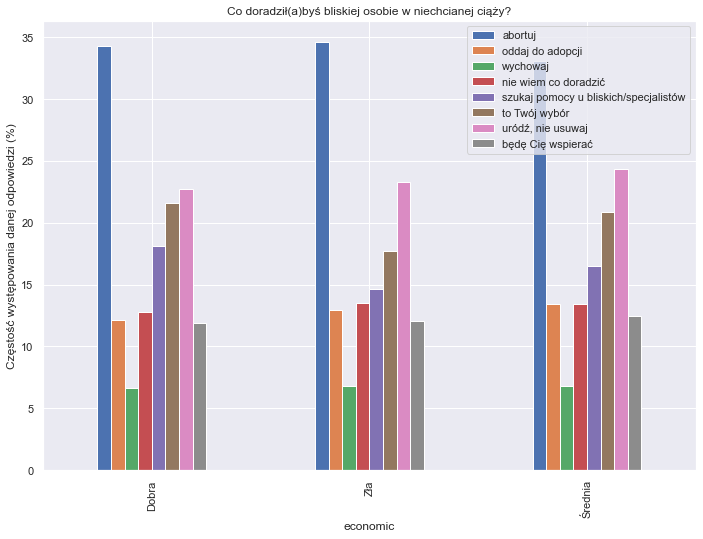

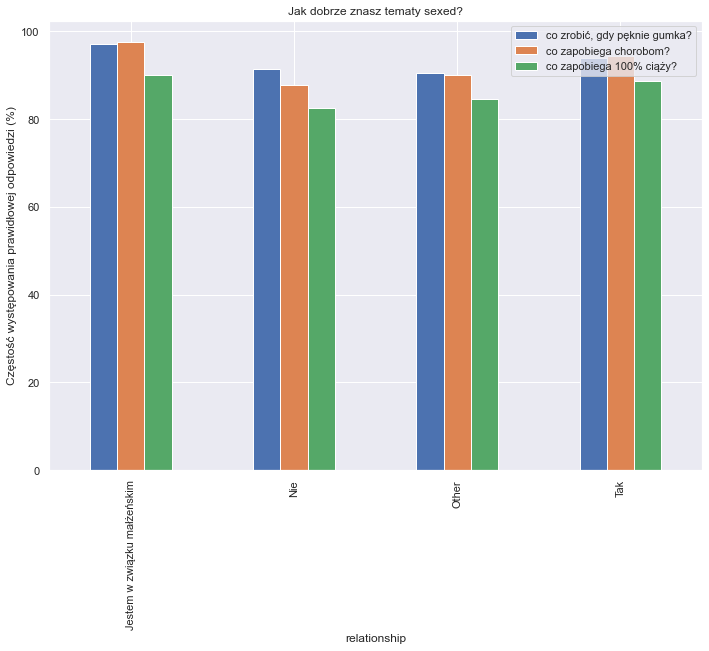

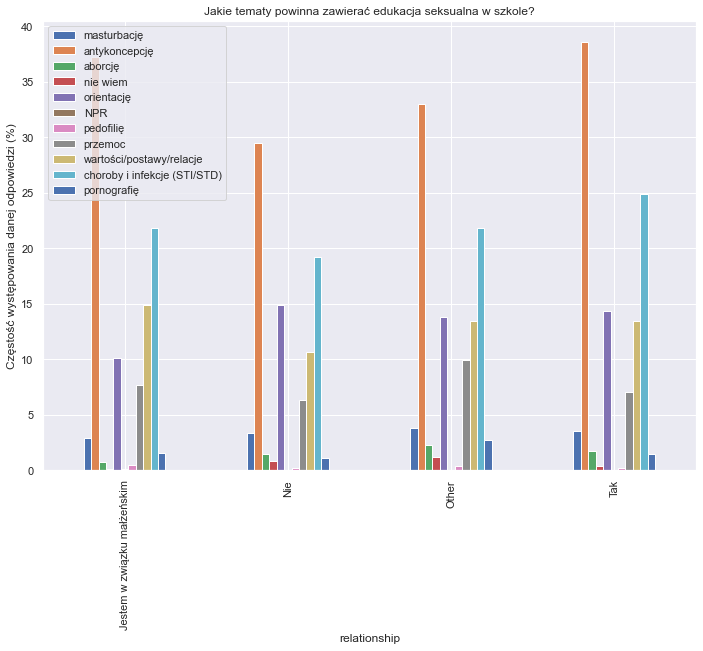

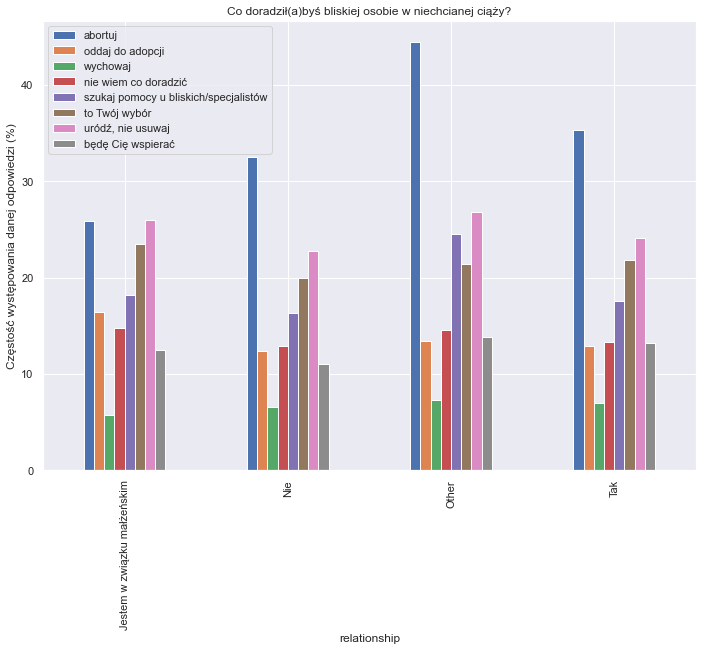

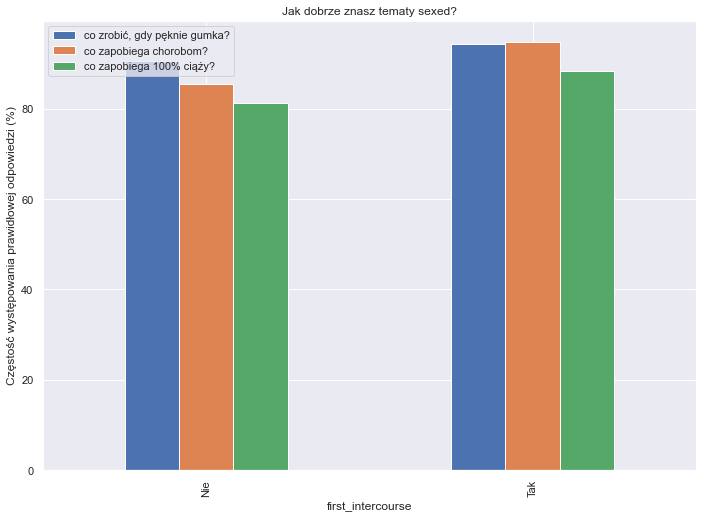

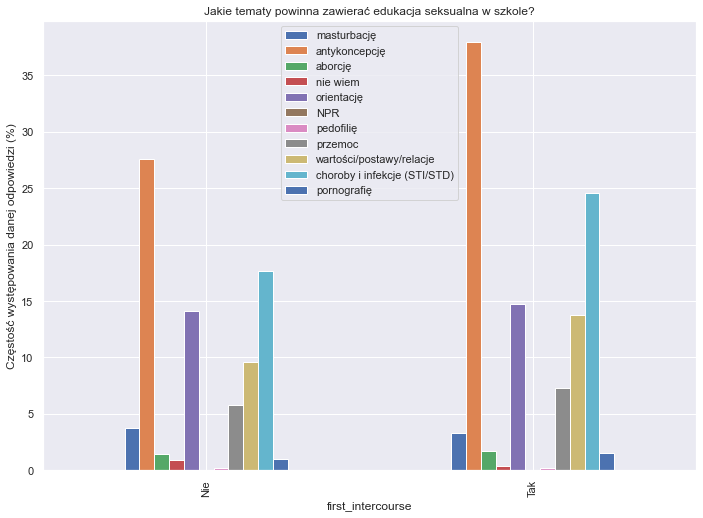

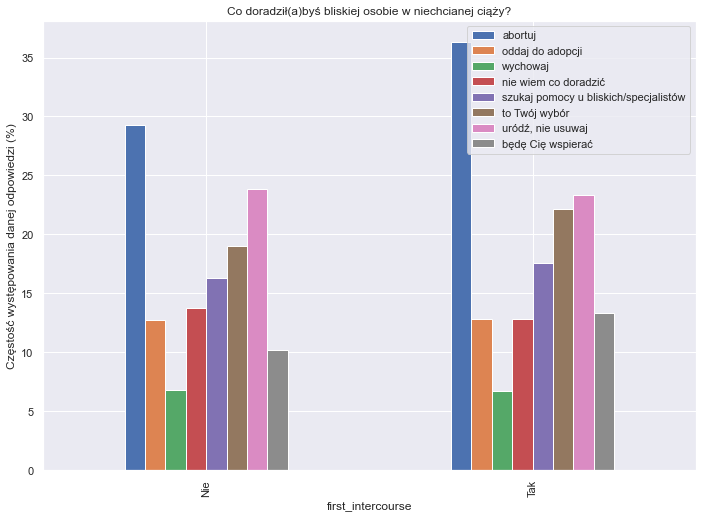

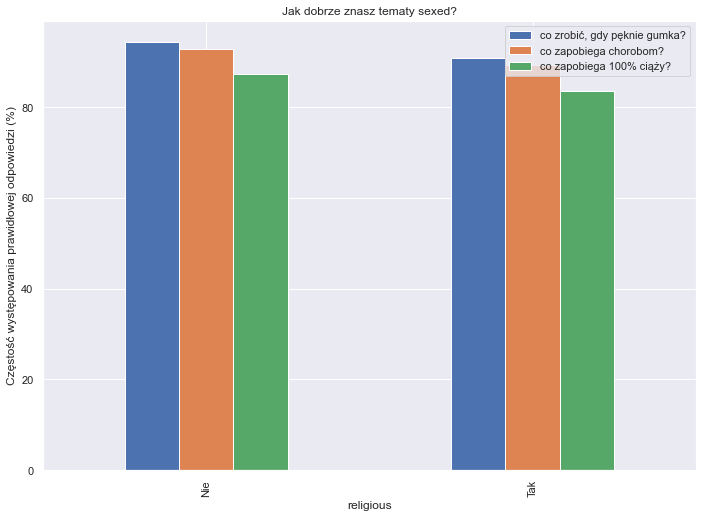

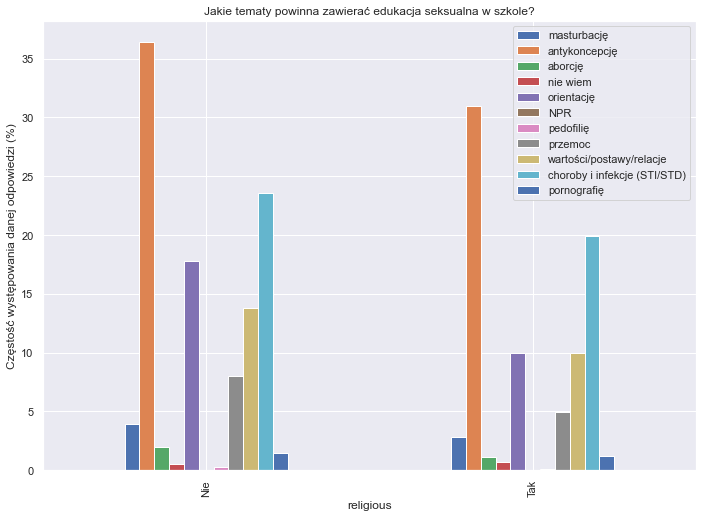

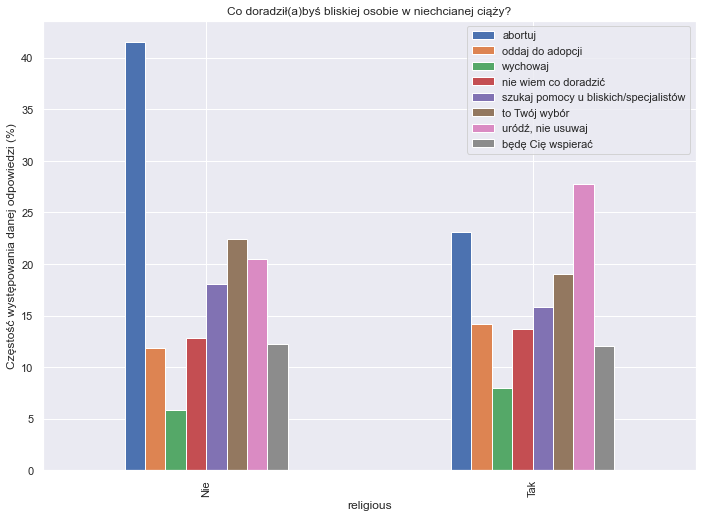

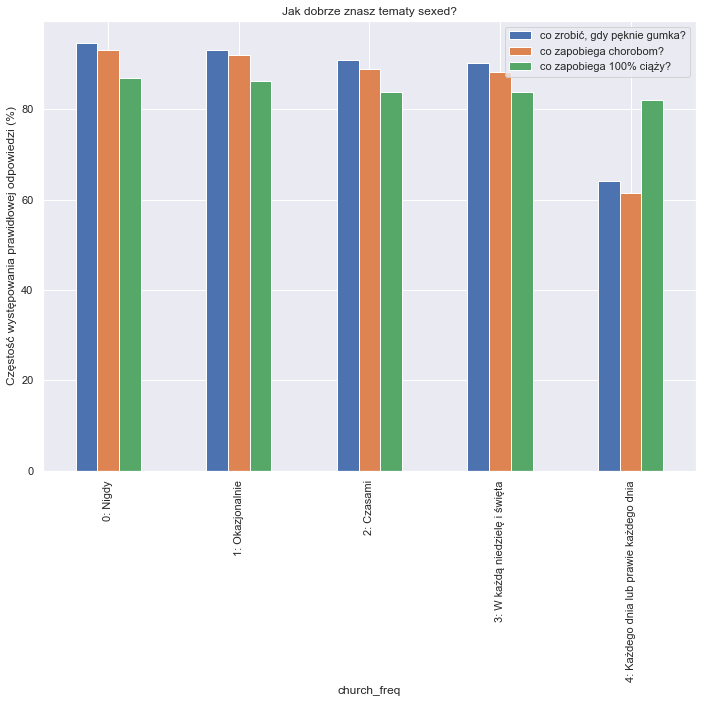

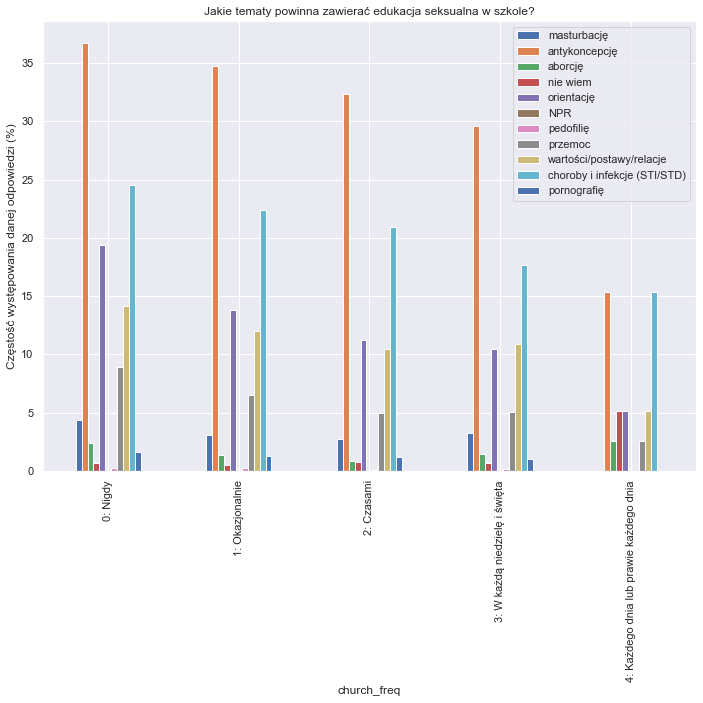

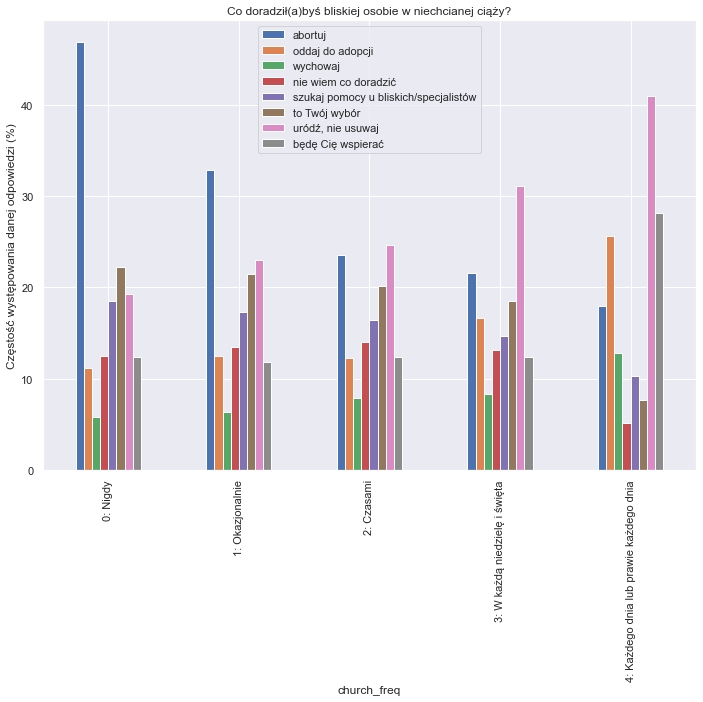

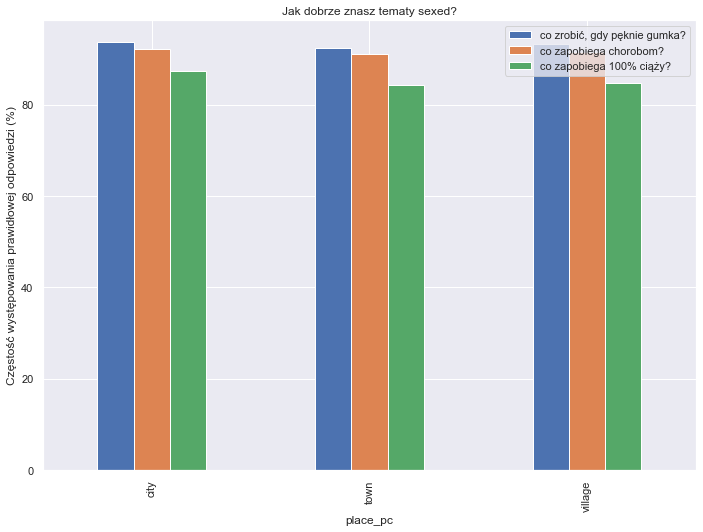

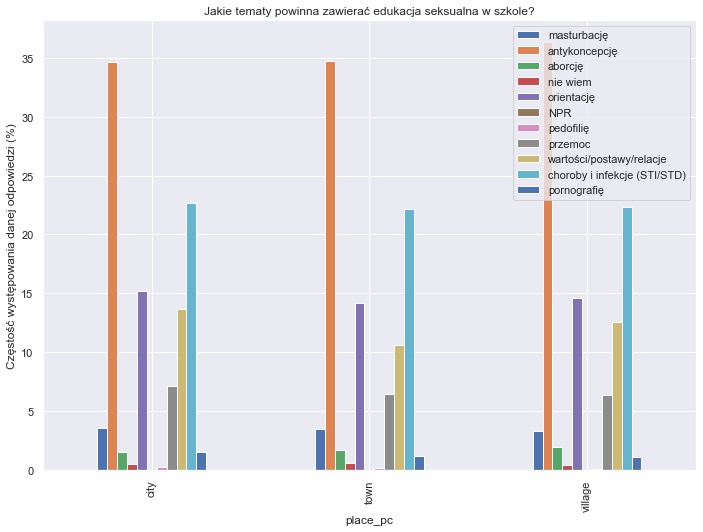

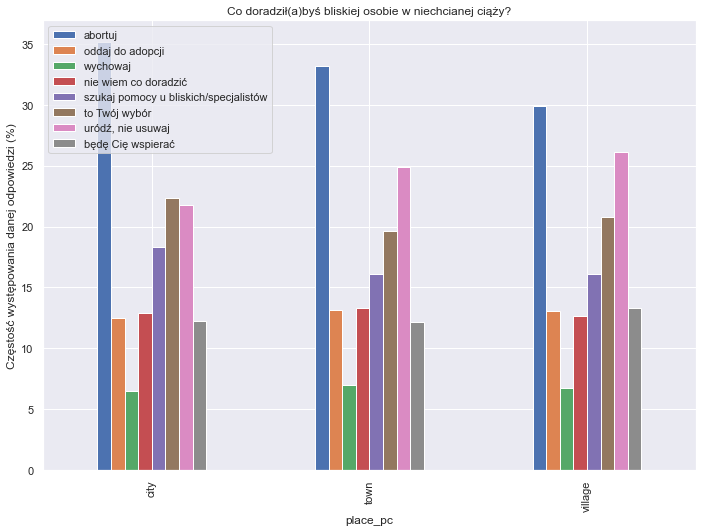

In [30]:
for cat in ['gender', 'economic', 'relationship', 'first_intercourse', 'religious',
            'church_freq', 'place_pc']:

    visualize(cat)